In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import talib

Populating the interactive namespace from numpy and matplotlib


In [2]:
def crop(df, start='2016-03-01 10:00:00', end='2016-09-01 10:00:00'):
    df = df[df[df.dt == start].index[0]:df[df.dt == end].index[0]]
    df.index = pd.RangeIndex(df.shape[0])
    return df

In [3]:
PATH_TO_DATA = os.getcwd()
PATH_TO_DATA = PATH_TO_DATA[:-PATH_TO_DATA[::-1].find("/")]
PATH_TO_DATA += "data/shares/semiconductors/"

df_mu = crop(pd.read_csv(PATH_TO_DATA + "MU.csv", sep=','))
df_amat = crop(pd.read_csv(PATH_TO_DATA + "AMAT.csv", sep=','))
df_amd = crop(pd.read_csv(PATH_TO_DATA + "AMD.csv", sep=','))
df_intc = crop(pd.read_csv(PATH_TO_DATA + "INTC.csv", sep=','))
df_klac = crop(pd.read_csv(PATH_TO_DATA + "KLAC.csv", sep=','))
df_lrcx = crop(pd.read_csv(PATH_TO_DATA + "LRCX.csv", sep=','))
df_mchp = crop(pd.read_csv(PATH_TO_DATA + "MCHP.csv", sep=','))
df_nvda = crop(pd.read_csv(PATH_TO_DATA + "NVDA.csv", sep=','))
df_ter = crop(pd.read_csv(PATH_TO_DATA + "TER.csv", sep=','))

In [4]:
dfs = [df_mu, df_amat, df_amd, df_intc, df_klac, df_lrcx, df_mchp, df_nvda, df_ter]
prices = []
for df in dfs:
    prices.append(df['open'].values)
    print(df.shape)

(3354, 6)
(3354, 6)
(3354, 6)
(3354, 6)
(3354, 6)
(3354, 6)
(3354, 6)
(3354, 6)
(3354, 6)


In [5]:
from statsmodels.tsa.stattools import coint

def find_cointegrated(prices):
    n = len(dfs)
    cointegrated = []
    train_size = int(len(prices[0]) * 0.7)
    for i in range(n):
        for j in range(i + 1, n):
             
            score, p, _ = coint(prices[i][:train_size], prices[j][:train_size])
            if p < 0.05:
                cointegrated.append((i, j))
    return cointegrated

cointegrated = find_cointegrated(prices)
print(cointegrated) #intc/lrcx (1.0)

[(6, 7)]


In [6]:
coint(df_mchp['open'].values[:2347], df_nvda['open'].values[:2347])[1] #check

0.0276304441213024

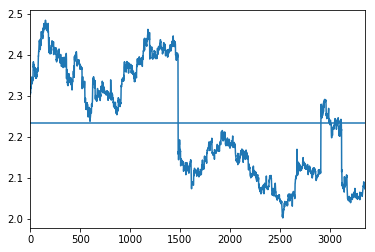

In [7]:
ratios = df_mchp['open'] / df_amat['open']
ratios.plot()
plt.axhline(ratios.mean())
plt.show()

(4311, 6)
(4311, 6)


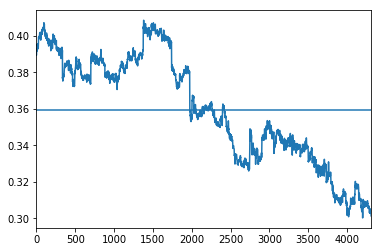

In [8]:
df_intc_next = crop(pd.read_csv(PATH_TO_DATA + "INTC.csv", sep=','), 
                    start='2016-07-01 10:00:00', 
                    end='2017-03-01 10:00:00')
df_lrcx_next = crop(pd.read_csv(PATH_TO_DATA + "LRCX.csv", sep=','), 
                    start='2016-07-01 10:00:00', 
                    end='2017-03-01 11:15:00')
print(df_intc_next.shape)
print(df_lrcx_next.shape)

ratios = df_intc_next['open'] / df_lrcx_next['open']
ratios.plot()
plt.axhline(ratios.mean())
plt.show()

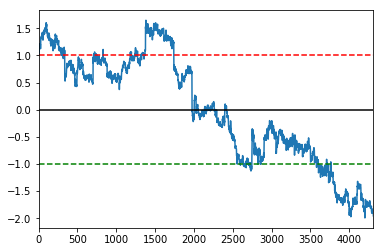

In [9]:
zscore = (ratios - ratios.mean()) / np.std(ratios)
zscore.plot()
plt.axhline(zscore.mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.show()

Pairs trading: fail

Cointegration on train doesn't lead to cointegration on test